In [1]:
import scanpy as sc
import scFates as scf
import warnings
warnings.filterwarnings("ignore")
adata = sc.read("adata_final.h5ad")

scf.set_figure_pubready()

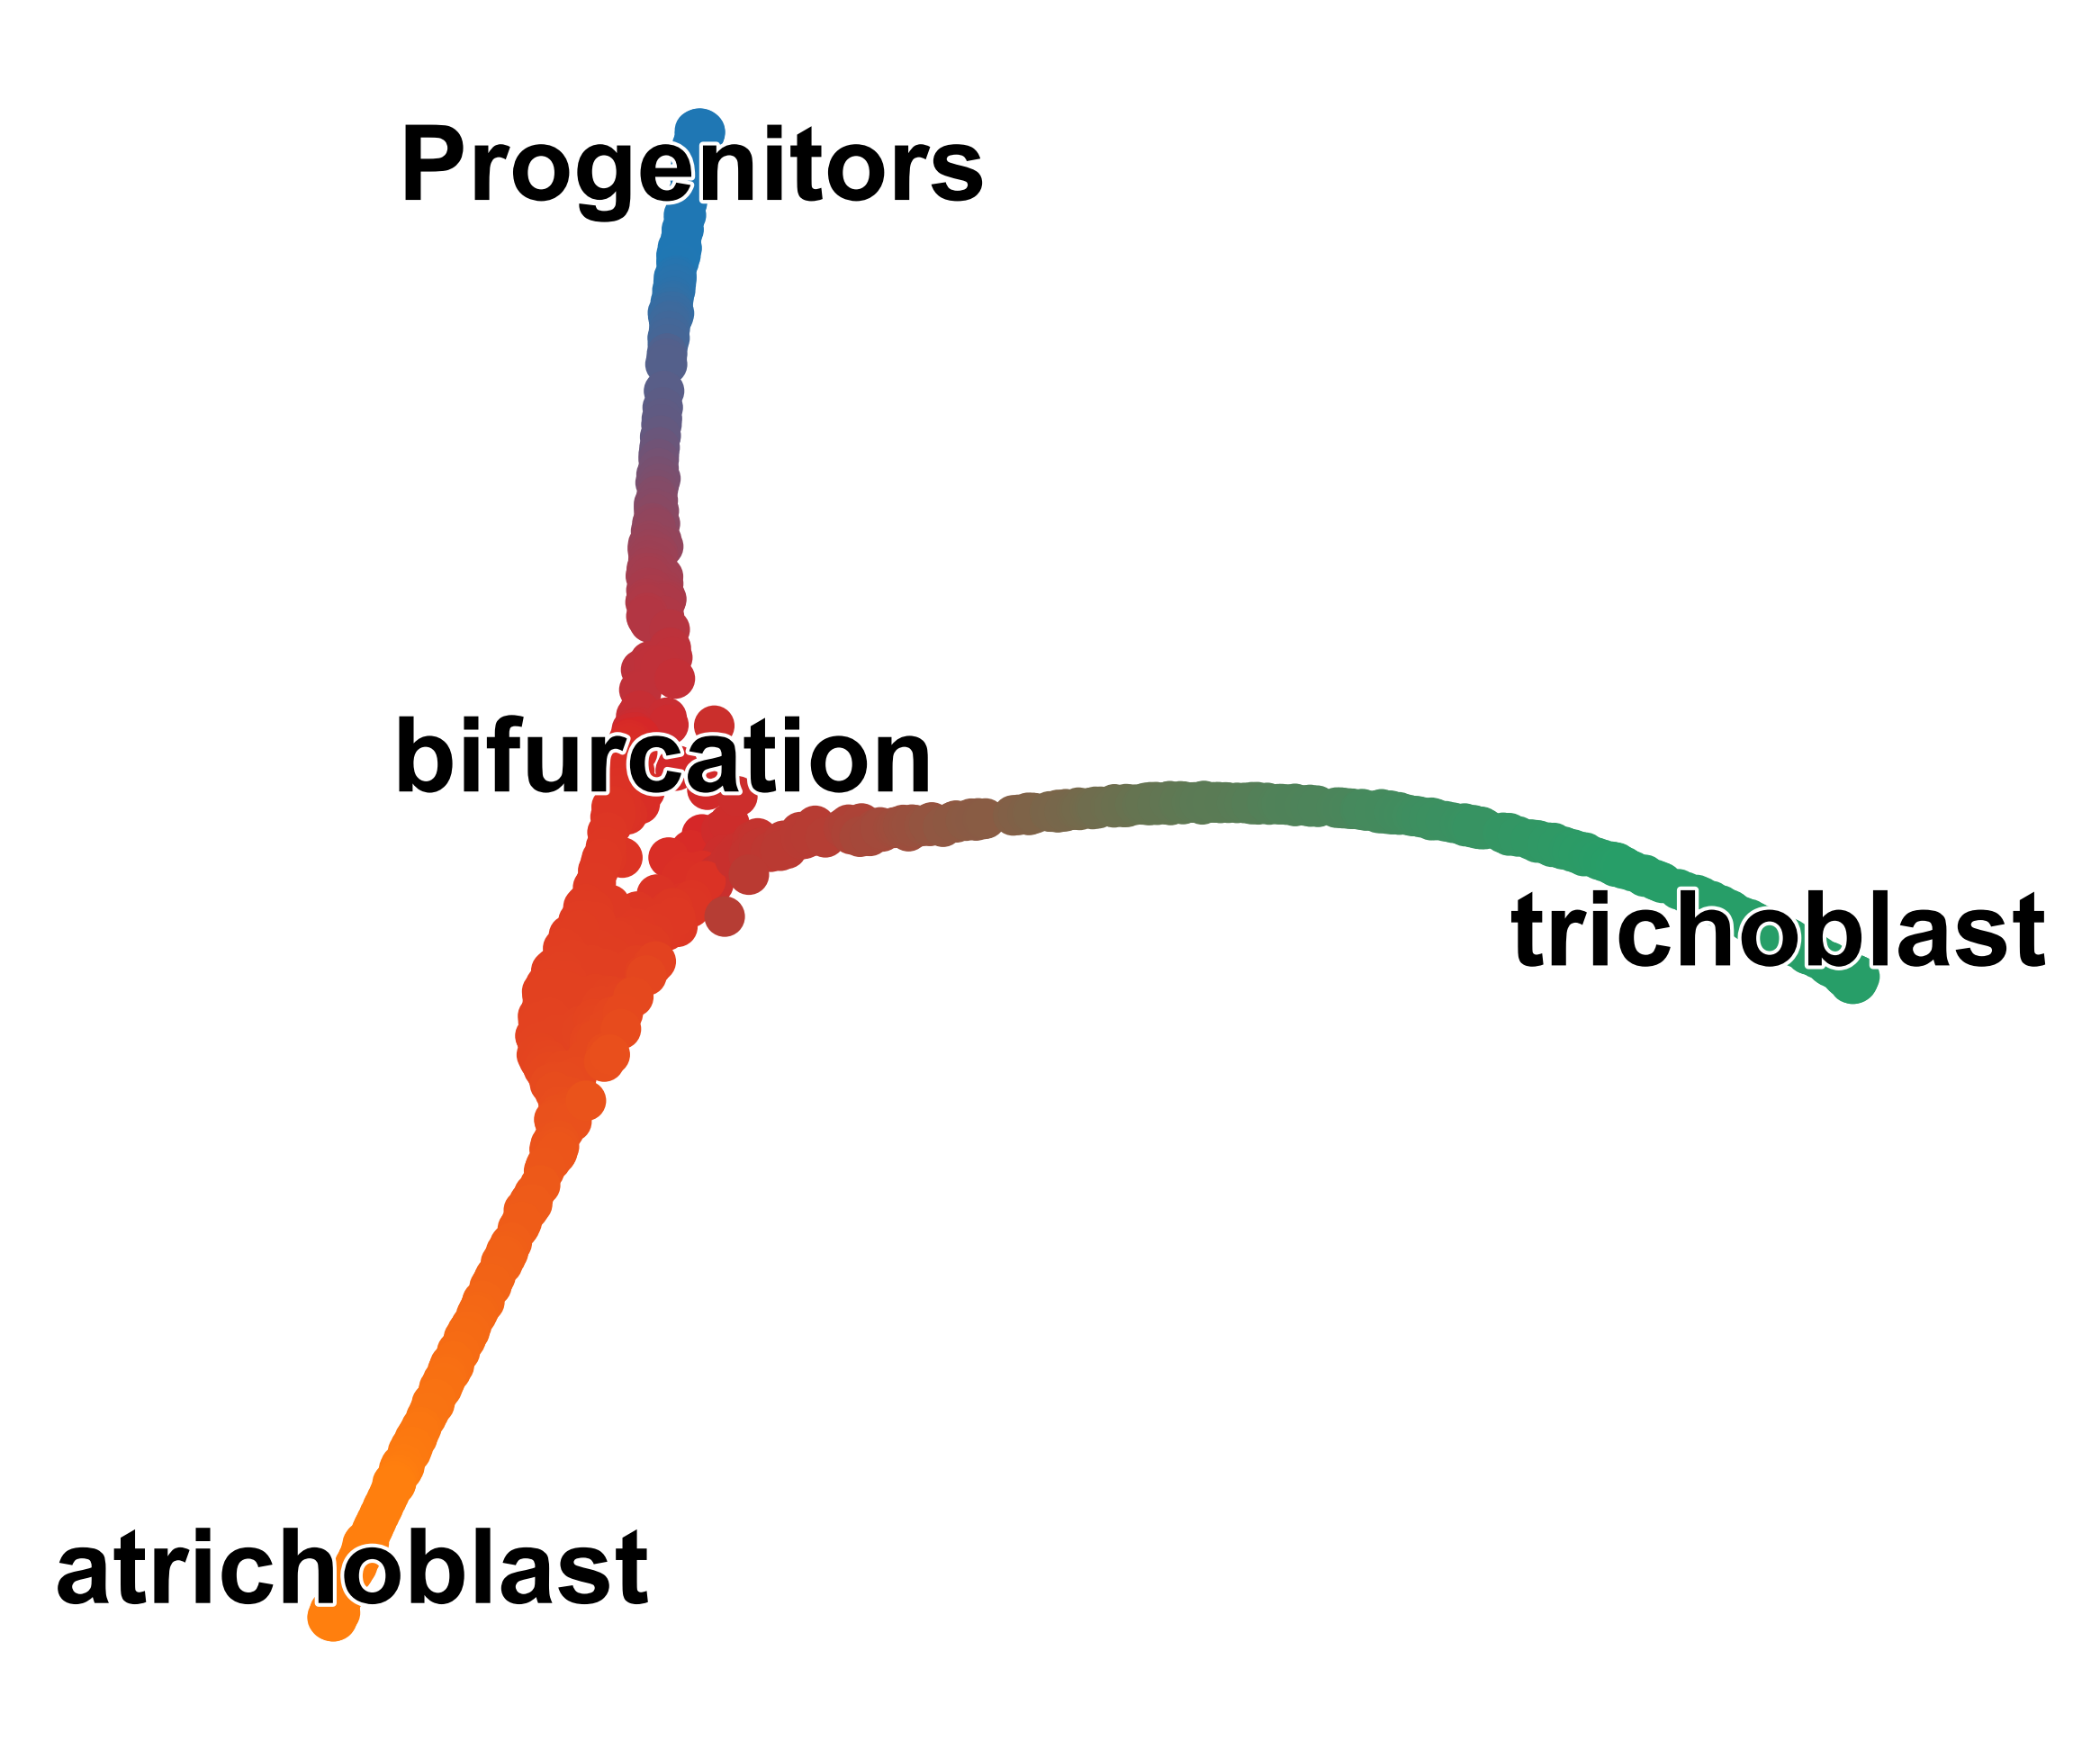

In [2]:
sc.set_figure_params(frameon=False,dpi=300)
scf.pl.milestones(adata,annotate=True,title="",save="overview.pdf")

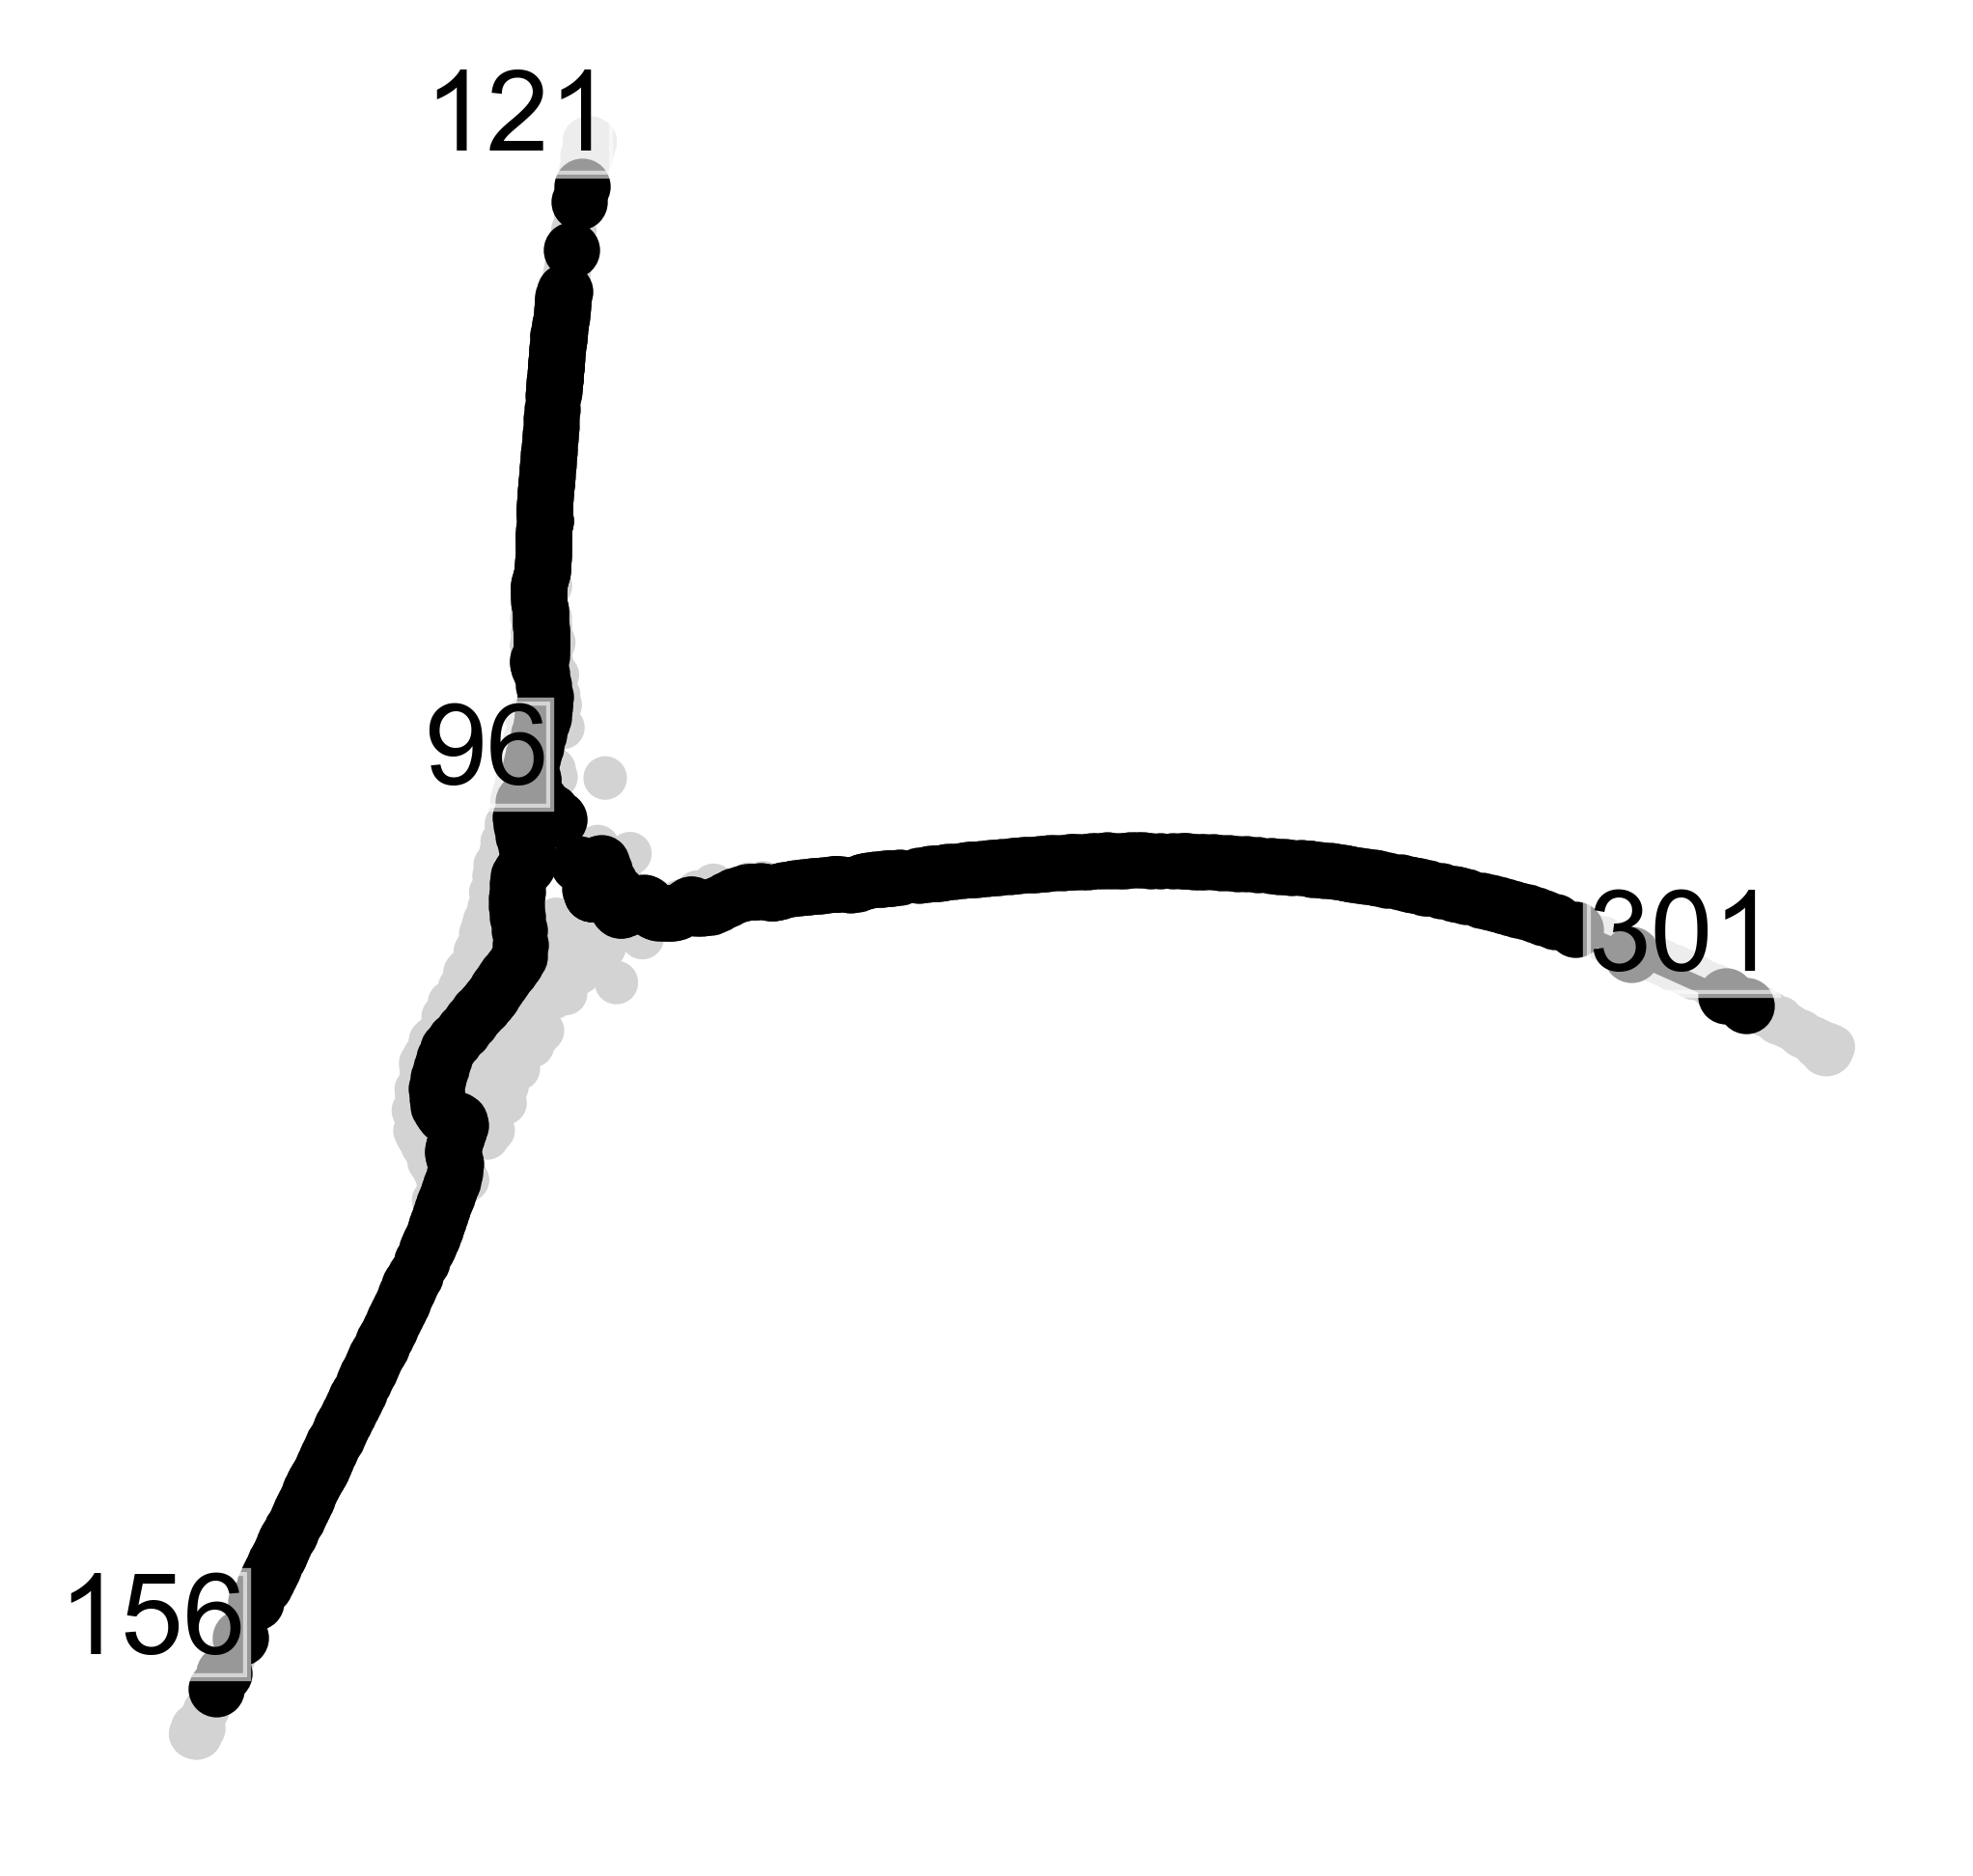

In [3]:
scf.pl.graph(adata)

In [4]:
import numpy as np
proj = (np.dot(adata.obsm["X_draw_graph_fa"].T, adata.obsm["X_R"]) / adata.obsm["X_R"].sum(axis=0)).T

In [5]:
proj[96,:]

array([-1171.4738708 ,   830.11651646])

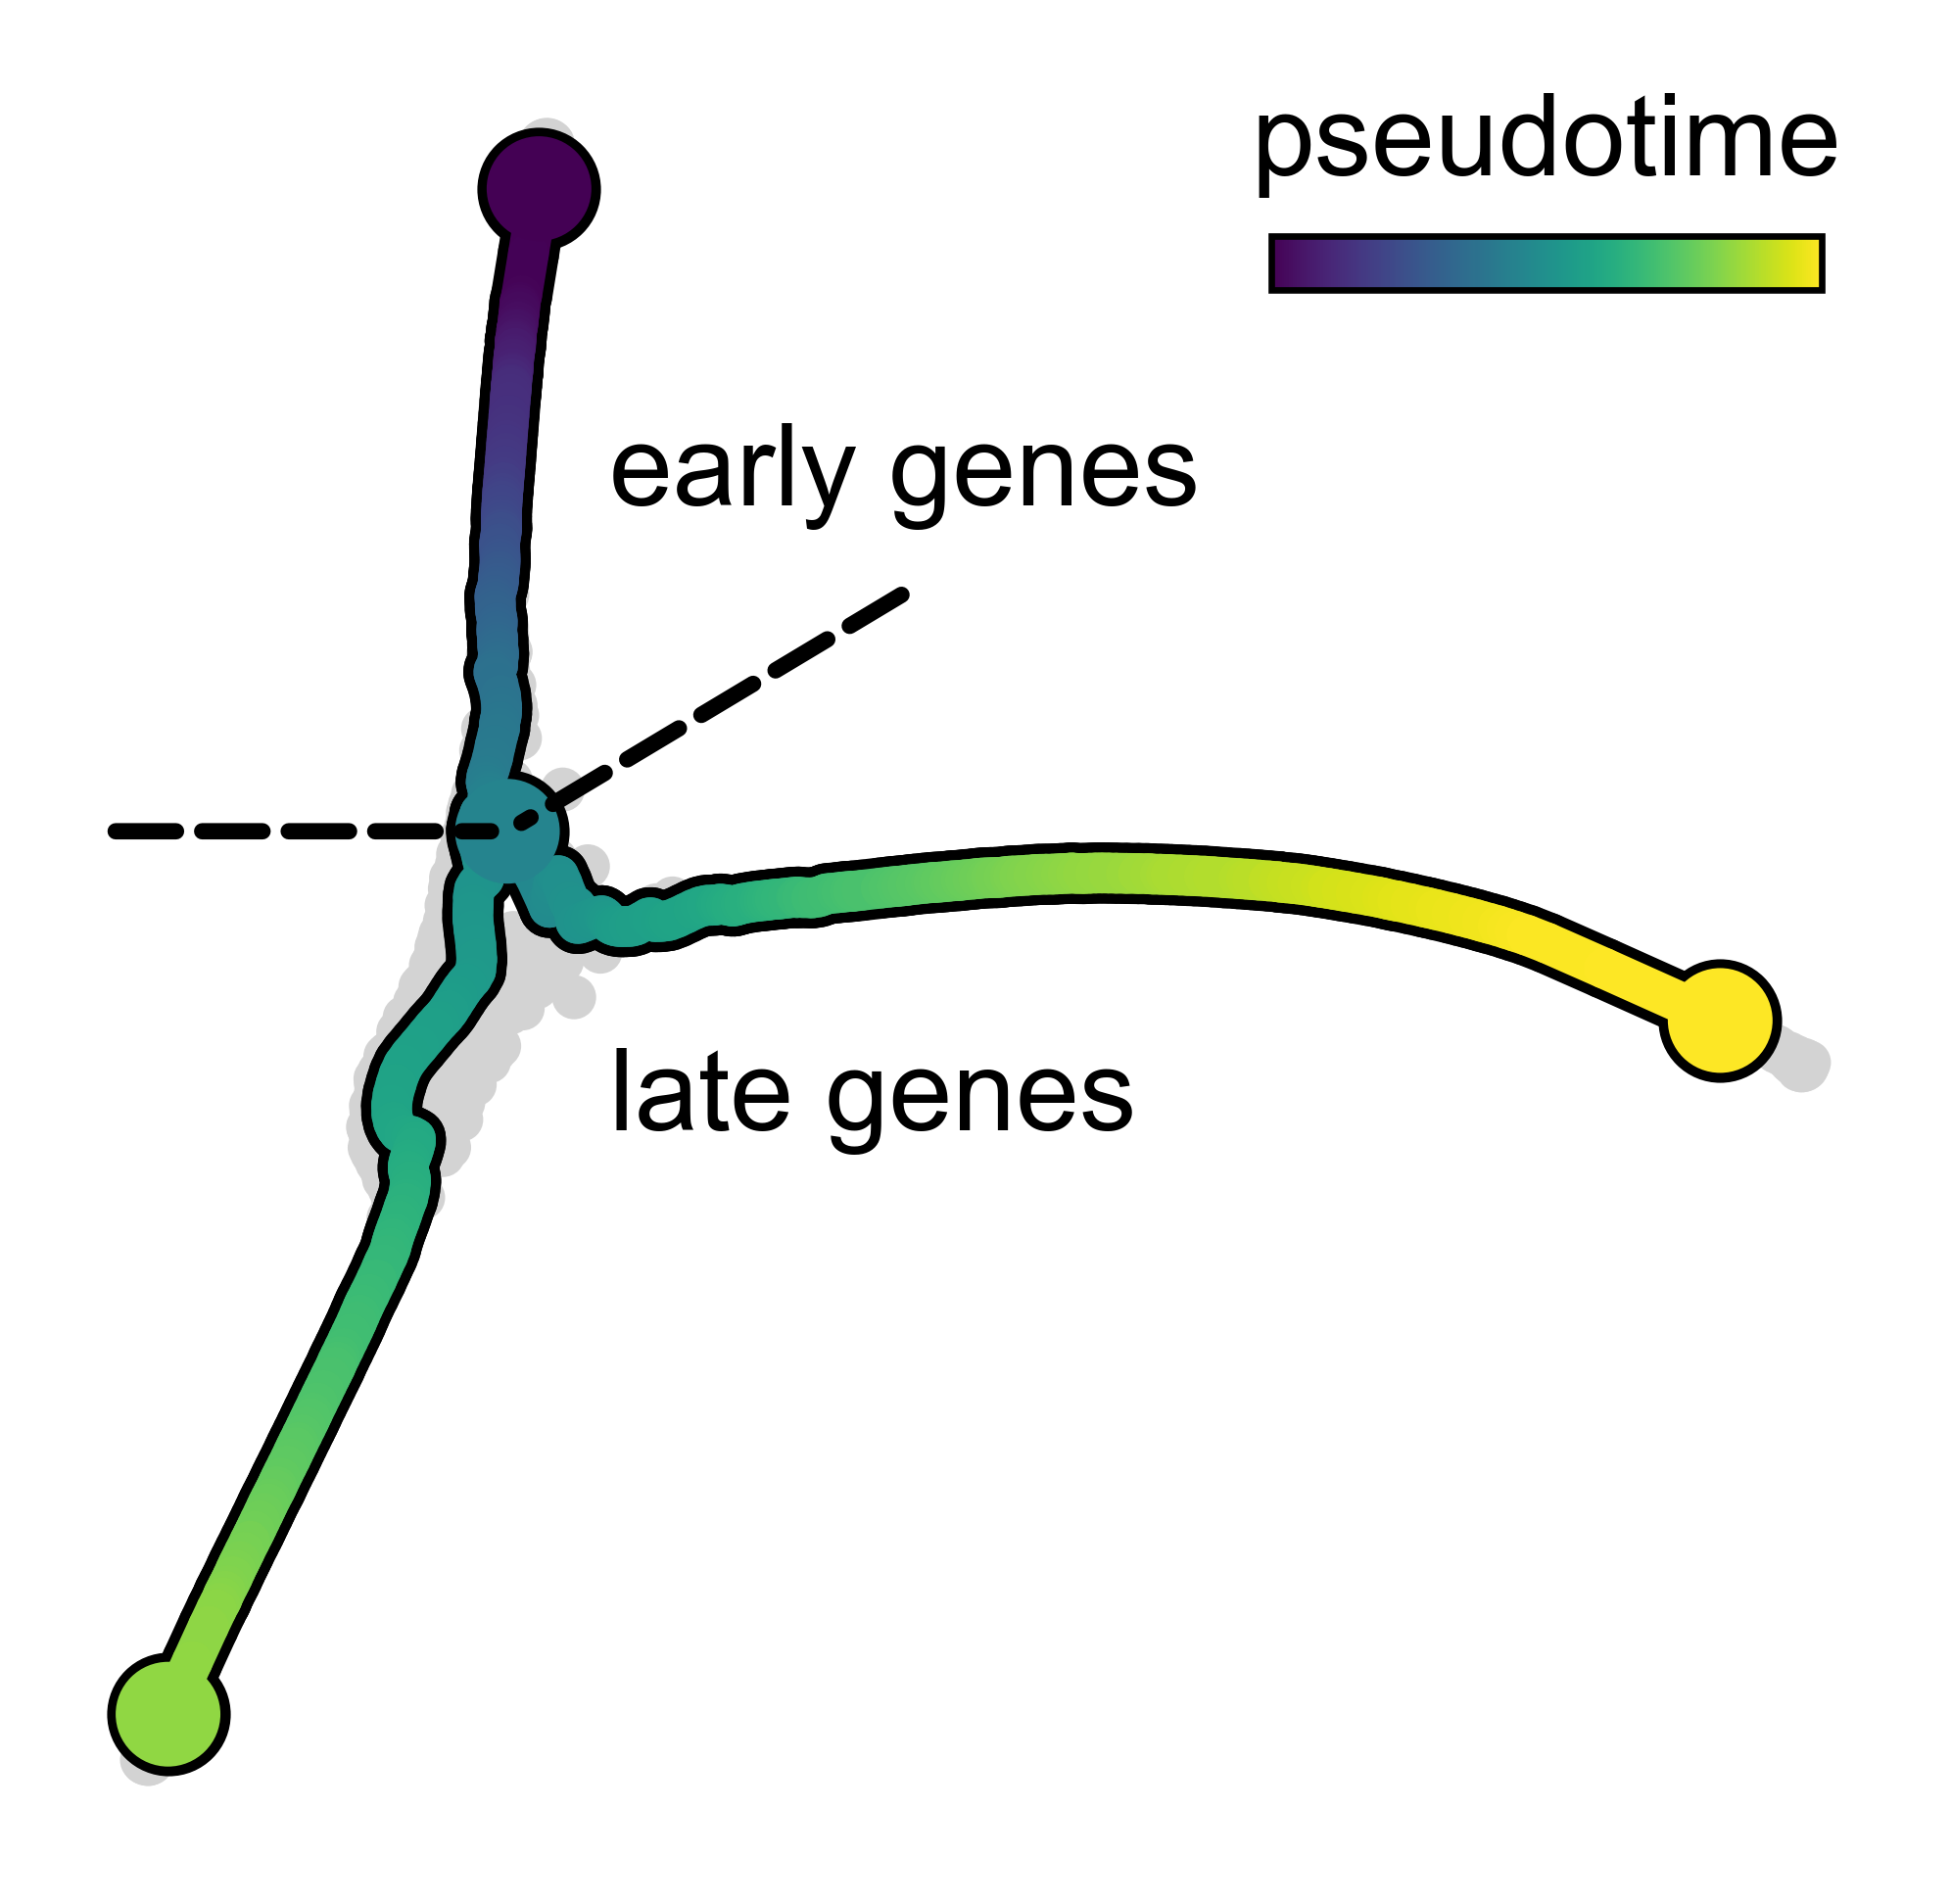

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
sc.set_figure_params(dpi=300,frameon=False)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax=scf.pl.trajectory(adata,frameon=False,show=False)
cbaxes = inset_axes(ax, width="30%", height="3%",bbox_to_anchor=(-0.01, -0.07, 1, 1),
                      bbox_transform=ax.transAxes) 

cb1 = matplotlib.colorbar.ColorbarBase(cbaxes, cmap=cm.viridis,
                                orientation='horizontal'  ,ticklocation="top",                    
                                ticks=[],label="pseudotime",
                                )
ax.annotate("",xy=proj[96,:],xytext=(-50, 0),ha="center",va="center",
             textcoords='offset points',arrowprops={"arrowstyle":"-","linestyle":"--","linewidth":2},
            zorder=10000)

ax.annotate("",xy=proj[96,:],xytext=(50, 30),ha="center",va="center",
             textcoords='offset points',arrowprops={"arrowstyle":"-","linestyle":"--","linewidth":2},
            zorder=10000)

ax.annotate("early genes",xy=(0.3,0.75),xycoords="axes fraction",zorder=10000,size=14)
ax.annotate("late genes",xy=(0.3,0.4),xycoords="axes fraction",zorder=10000,size=14)

plt.savefig("figures/early_pseudotime.pdf")

In [7]:
root="Progenitors"
miles=["trichoblast","atrichoblast"]

In [8]:
adata_s=scf.tl.simplify(adata,n_nodes=5,copy=True)

simplifying graph
node 13 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> graph simplified


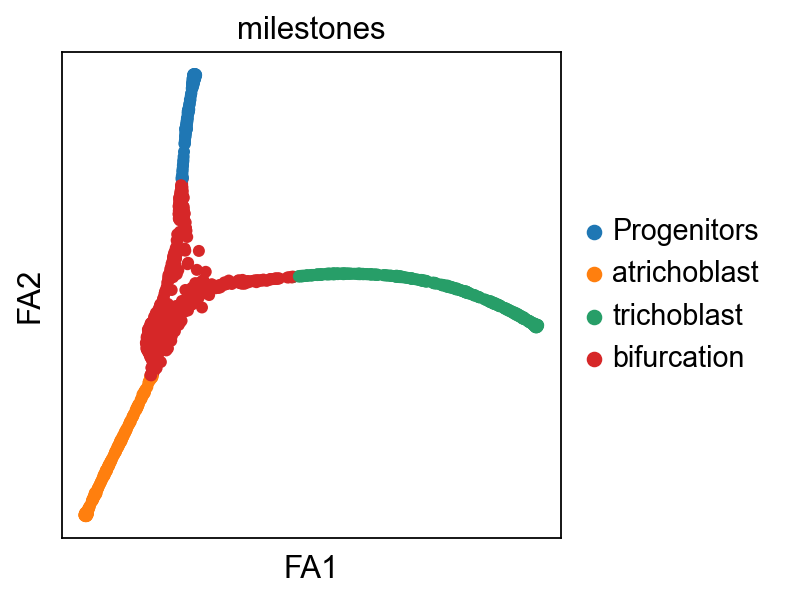

In [12]:
sc.pl.draw_graph(adata,color="milestones")

In [17]:
adata_s.obs.milestones=adata.obs.milestones

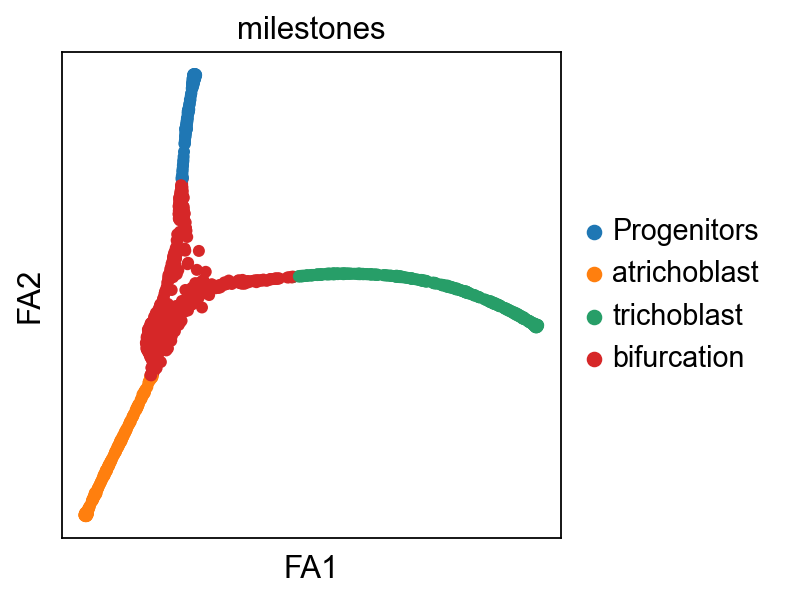

In [18]:
sc.pl.draw_graph(adata_s,color="milestones")

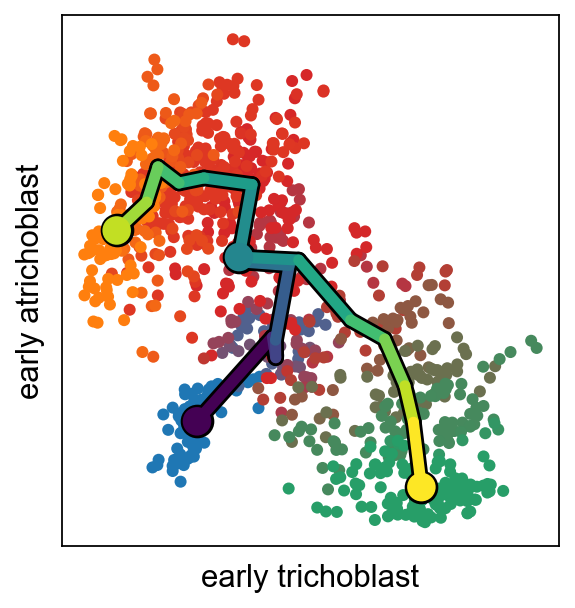

In [27]:
sc.set_figure_params()
scf.pl.modules(adata_s,root,miles,smooth=True,show_traj=True,module="early",save="early.pdf")

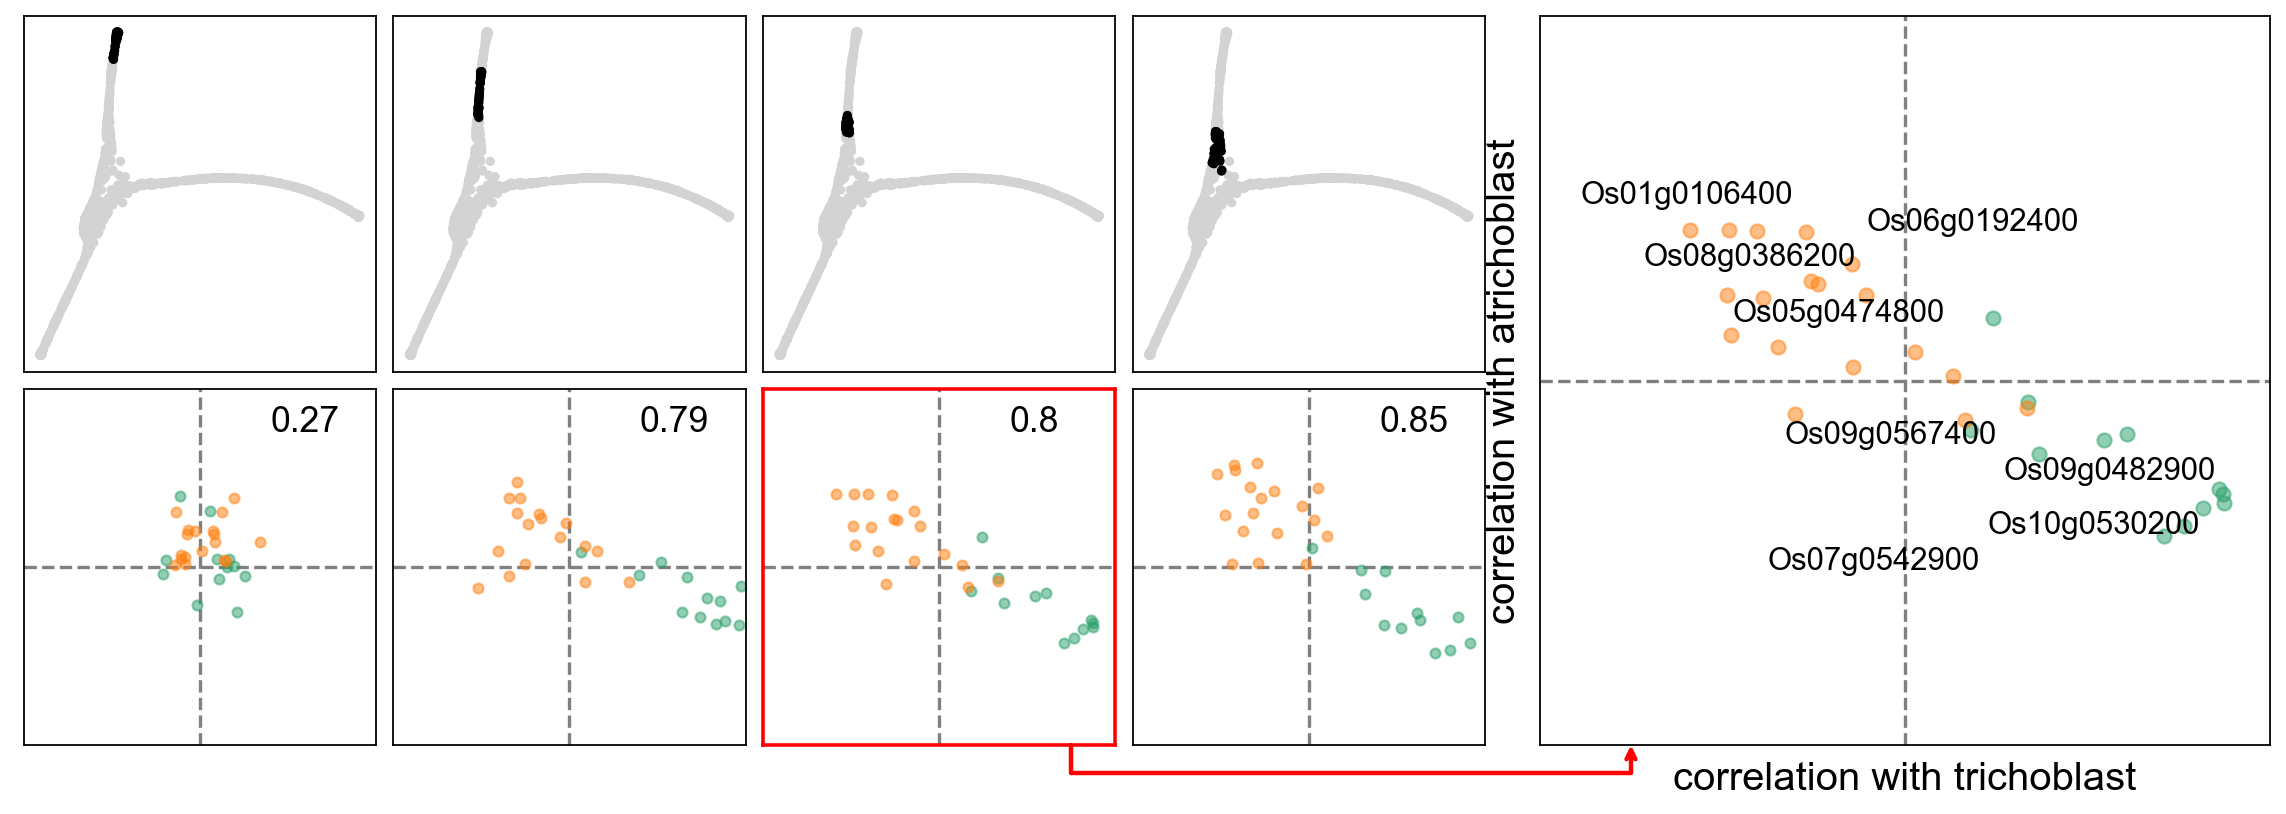

In [37]:
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=[0,2,3,4],focus=2,save=".pdf")

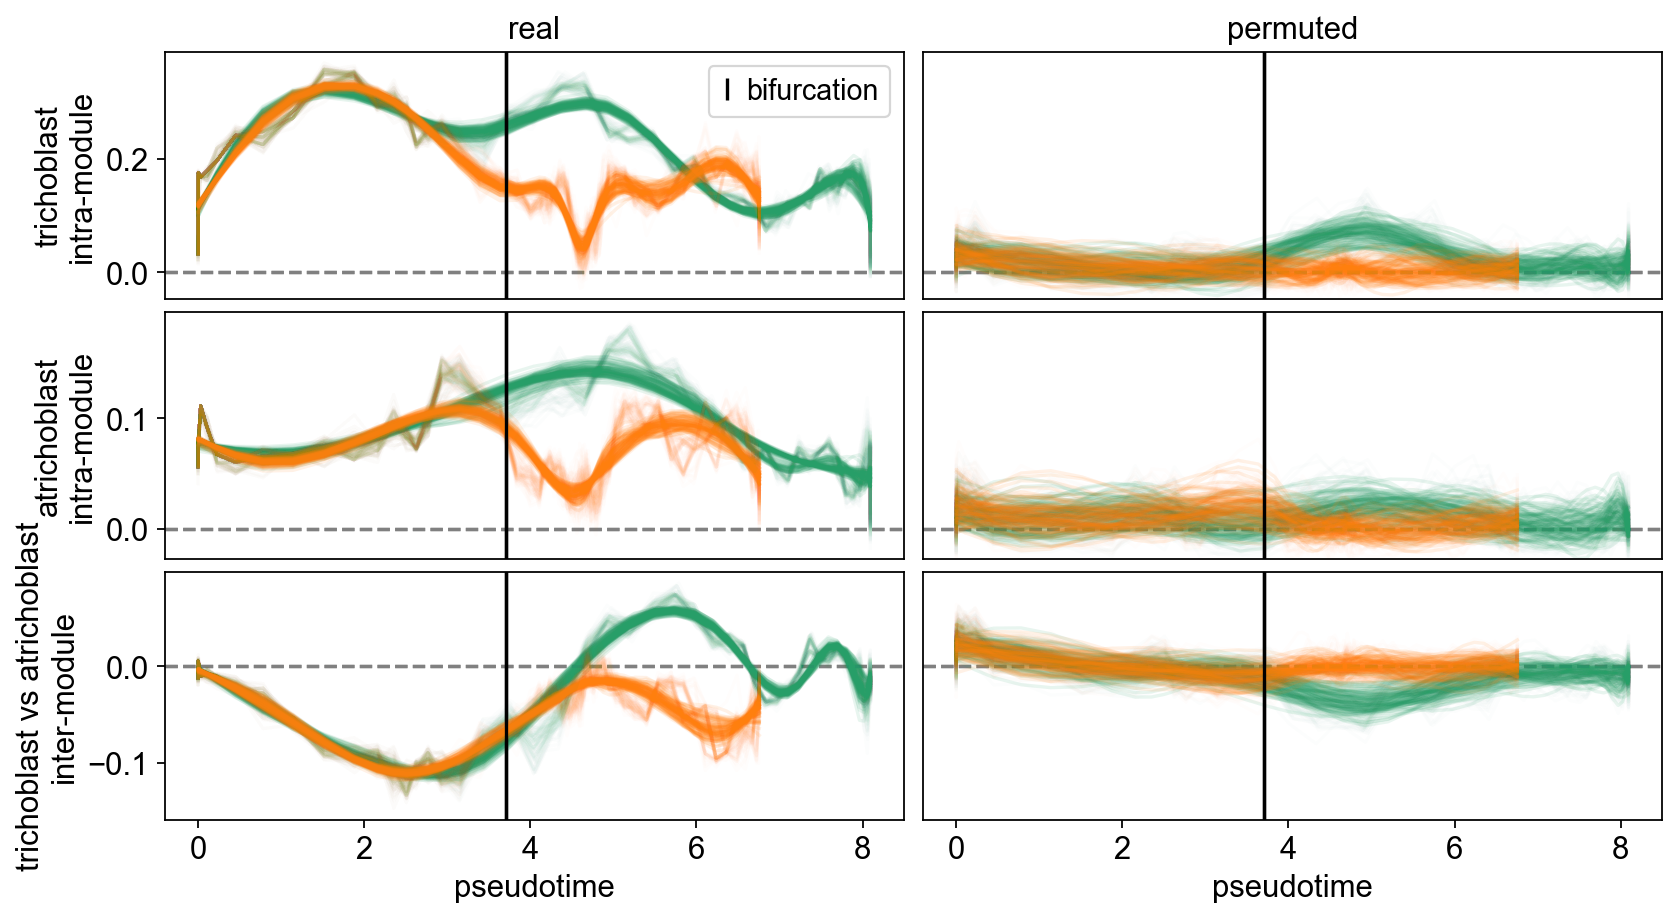

In [20]:
scf.pl.synchro_path(adata,root,miles,save="sync.pdf")

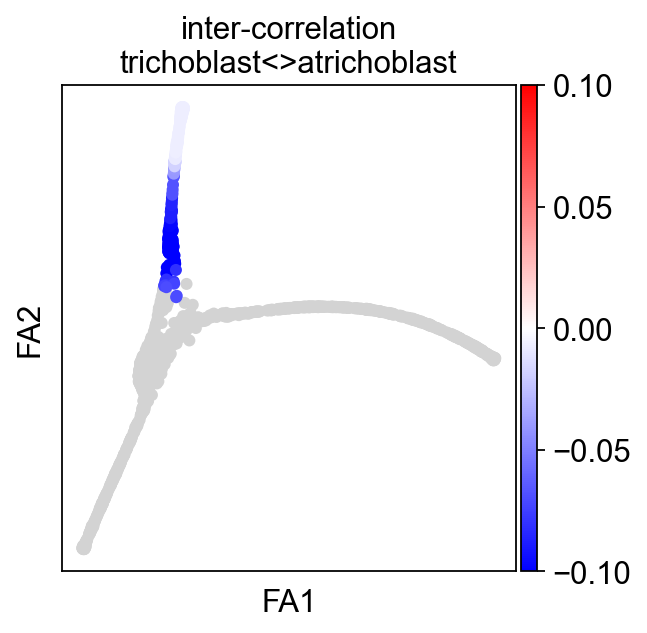

In [26]:
sc.pl.draw_graph(adata,color="inter_cor Progenitors->trichoblast<>atrichoblast",
                 title="inter-correlation\ntrichoblast<>atrichoblast",cmap="bwr",vmax=.1,vmin=-.1,save="intercor.pdf")

In [2]:
import sys
import numpy as np
fname="fig"
path="/".join(np.array(sys.executable.split("/"))[:-1])

In [12]:
%%bash -s $fname $path
cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=240mm,paperwidth=210mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphbox,graphicx} 
\usepackage{adjustbox}

\begin{document}
\setmainfont{Arial}

\noindent
\normalsize 

\fontsize{13pt}{13pt}\selectfont

\raggedright \begin{minipage}[t]{.34\textwidth}
\raggedright \textbf{g} \textit{Oryza sativa} dataset

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/milestonesoverview.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.31\textwidth}
\raggedright \textbf{h} Learned trajectory

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/early_pseudotime.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.33\textwidth}
\raggedright \textbf{i} Co-activation of early modules

\vspace{1ex}

\includegraphics[width=.9\textwidth]{figures/modulesearly.pdf}
\end{minipage}\hfill

\raggedright \textbf{j} Early module correlations

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/slide_cors.pdf}

\vspace{1ex}

\raggedright \begin{minipage}[t]{.65\textwidth}
\raggedright \textbf{k} Intra/inter-module correlations

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/synchro_pathsync.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.35\textwidth}
\raggedright \textbf{l} Onset of module repulsion

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/draw_graph_faintercor.pdf}
\end{minipage}\hfill



\clearpage
EOF
echo "\end{document}" >> $1.tex

$2/tectonic -c minimal $1.tex

$2/identify $1.pdf

$2/convert -flatten -density 300 $1.pdf $1.jpg

fig.pdf PDF 612x792 612x792+0+0 16-bit sRGB 3387B 0.000u 0:00.000


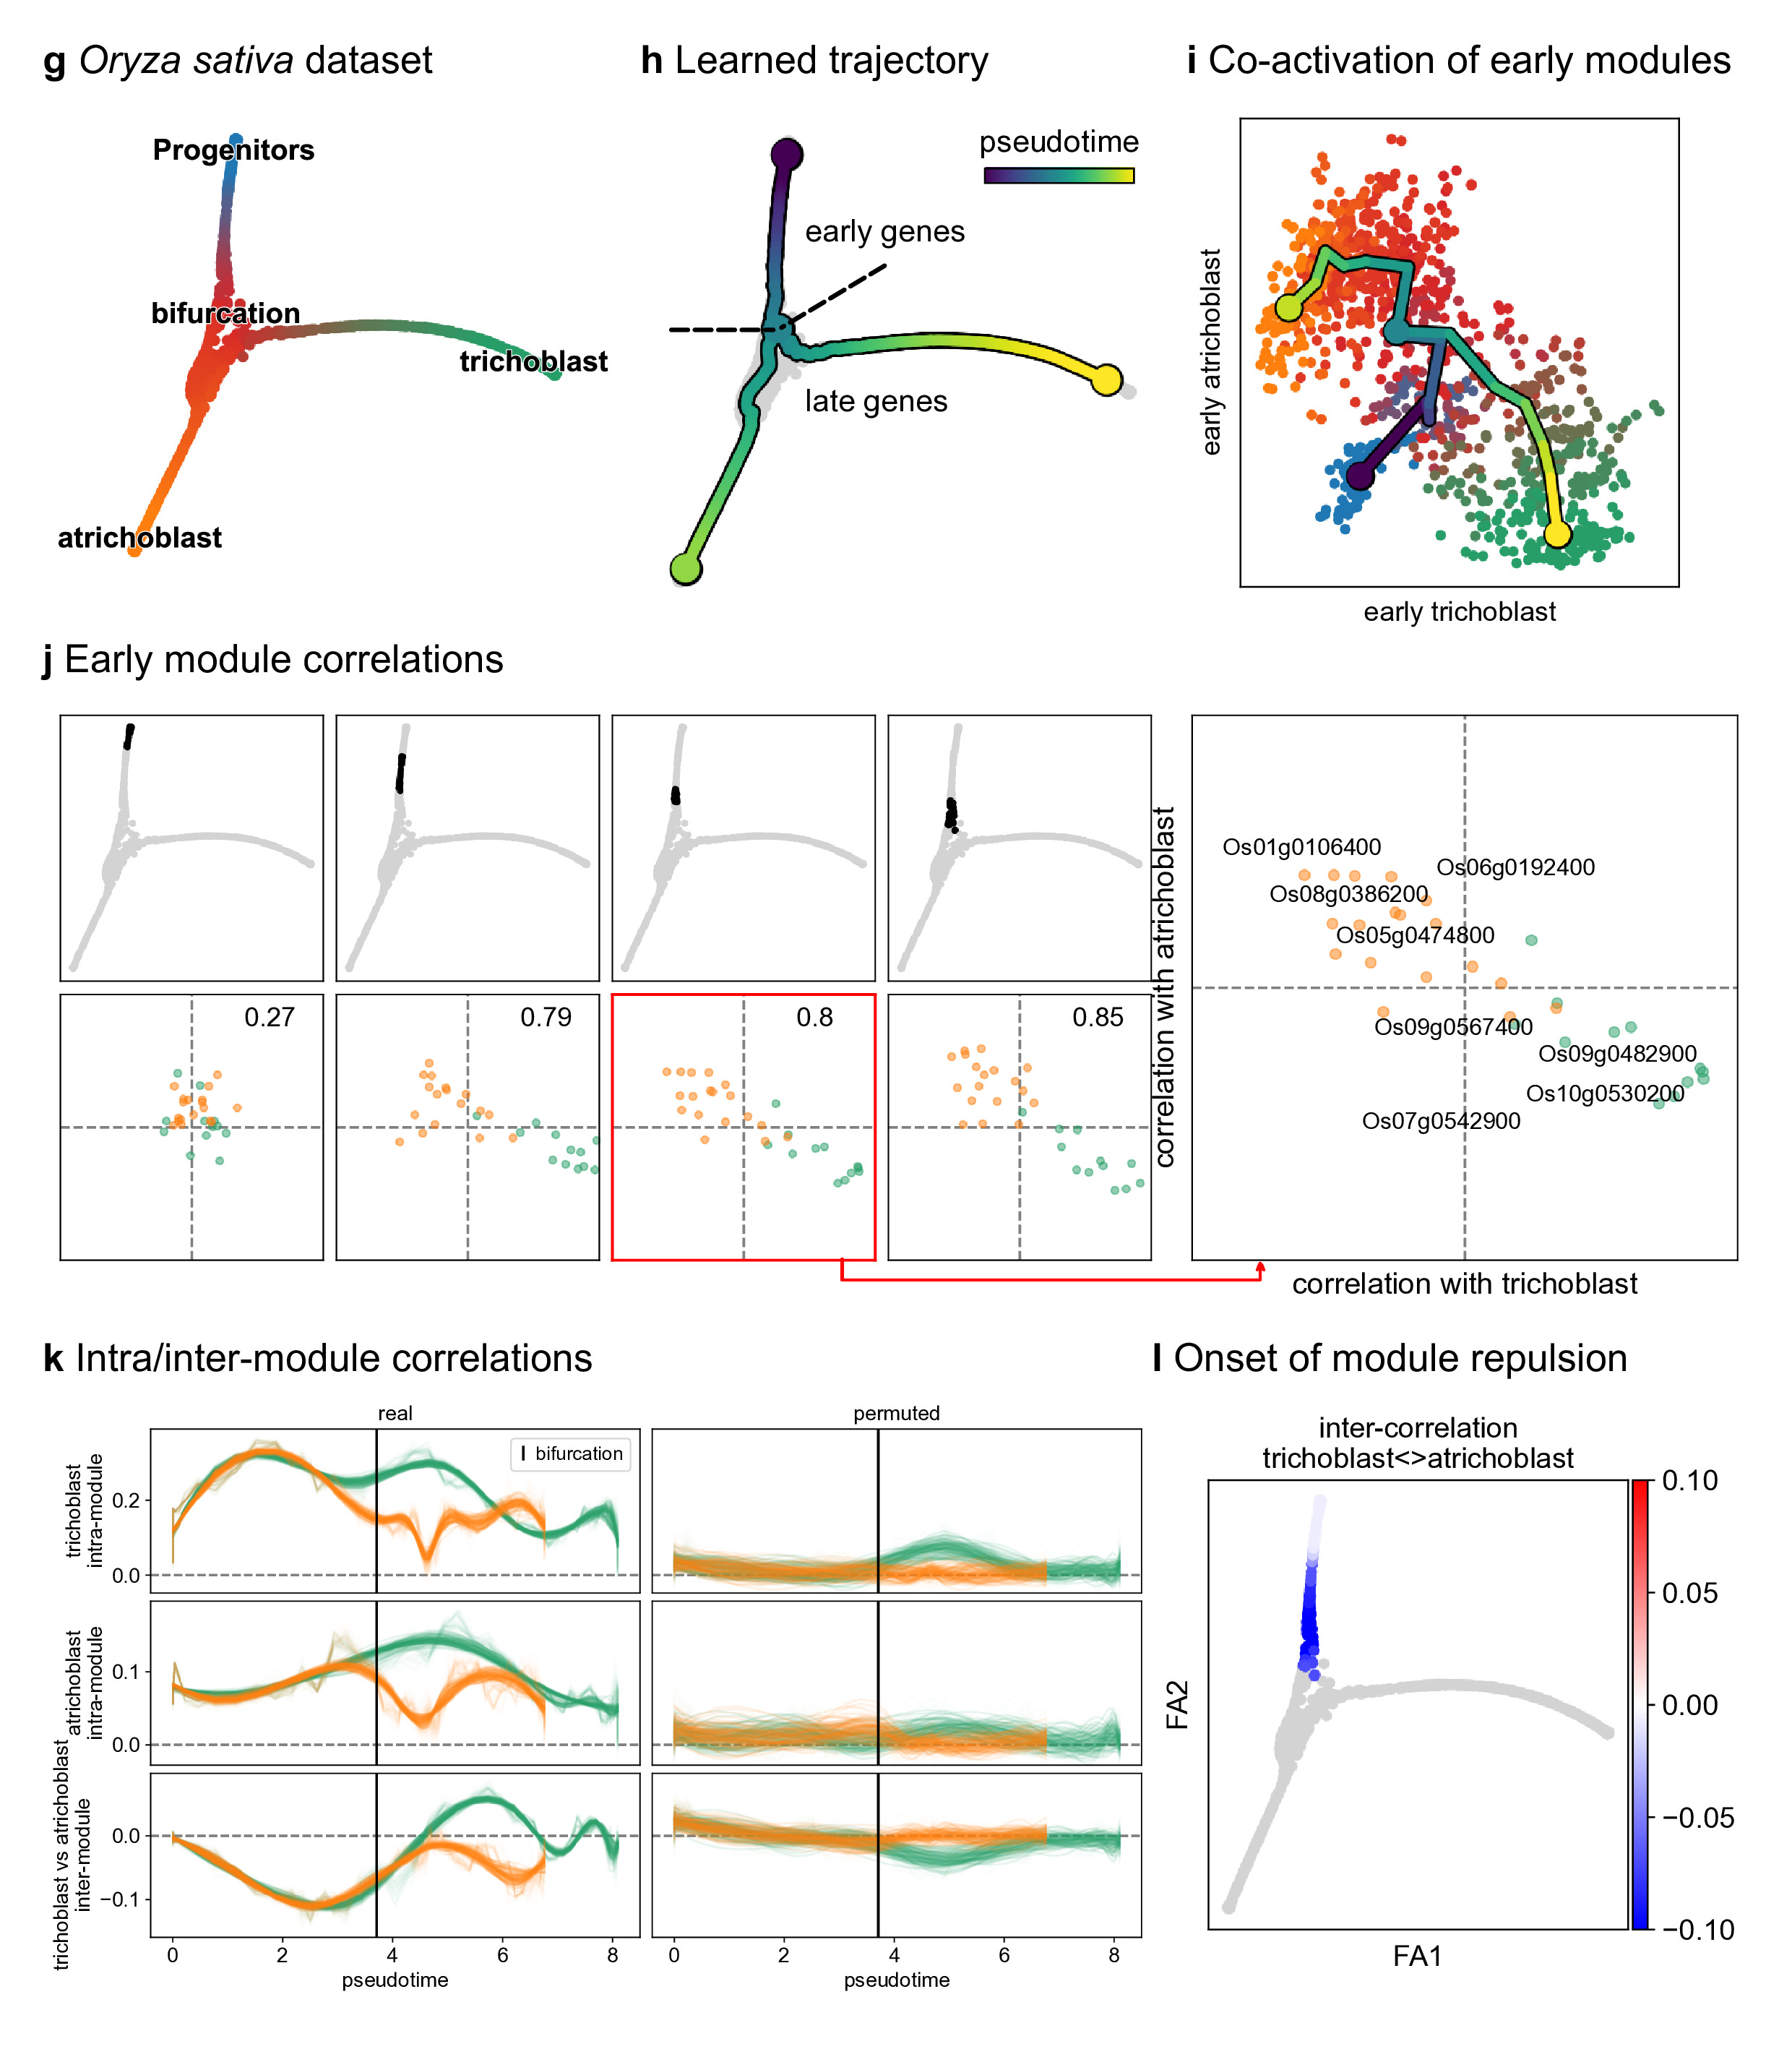

In [13]:
from IPython.display import Image
Image(filename=f'{fname}.jpg')